# Deep Learning Neural Network Model for Used Motorcycle Price Prediction
## IS794 AL - Deep Learning (Lab)
Kelompok B: <br>
- Daffa Kaisha Pratama Chandra (00000055770)
- Justine Donovan (00000063202)
- Marsella Patricia (00000063226)
- Reina Ratu Balqis (00000065099)
---
### Import Libraries

In [1]:
# Basic library
import pandas as pd
import numpy as np

# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
from plotly.subplots import make_subplots

# Handling imbalanced class using RandomOverSampling
from imblearn.over_sampling import RandomOverSampler

# Feature selection dengan random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Deep learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Ignore warning
import warnings
warnings.simplefilter("ignore")

---
Baca Dataset

In [2]:
yamaha = pd.read_csv("../Dataset/motor_yamaha_bekas.csv", engine='pyarrow')
honda = pd.read_csv("../Dataset/motor_honda_bekas.csv", engine='pyarrow')
kawasaki = pd.read_csv("../Dataset/motor_kawasaki_bekas.csv", engine='pyarrow')
suzuki = pd.read_csv("../Dataset/motor_suzuki_bekas.csv", engine='pyarrow')

Penjelasan singkat mengenai dataset yang digunakan: <br>
Dataset ini merupakan hasil web scraping dari website https://momotor.id/

In [3]:
print("Shape dari tiap dataset:")
print(f"Dataset Yamaha memiliki {yamaha.shape[1]} kolom dan {yamaha.shape[0]} baris.")
print(f"Dataset Honda memiliki {honda.shape[1]} kolom dan {honda.shape[0]} baris.")
print(f"Dataset Kawasaki memiliki {kawasaki.shape[1]} kolom dan {kawasaki.shape[0]} baris.")
print(f"Dataset Suzuki memiliki {suzuki.shape[1]} kolom dan {suzuki.shape[0]} baris.")

Shape dari tiap dataset:
Dataset Yamaha memiliki 10 kolom dan 493 baris.
Dataset Honda memiliki 10 kolom dan 966 baris.
Dataset Kawasaki memiliki 10 kolom dan 96 baris.
Dataset Suzuki memiliki 10 kolom dan 23 baris.


In [4]:
print("Informasi singkat dari tiap dataset:\n")
print("Yamaha:")
print(yamaha.info())
print("\nHonda:")
print(honda.info())
print("\nKawasaki:")
print(kawasaki.info())
print("\nSuzuki:")
print(suzuki.info())

Informasi singkat dari tiap dataset:

Yamaha:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama_motor       352 non-null    object 
 1   lokasi           352 non-null    object 
 2   harga            352 non-null    object 
 3   deskripsi        352 non-null    object 
 4   kapasitas_mesin  352 non-null    object 
 5   tahun            352 non-null    float64
 6   transmisi        352 non-null    object 
 7   kilometer        352 non-null    object 
 8   url              493 non-null    object 
 9   merk             493 non-null    object 
dtypes: float64(1), object(9)
memory usage: 38.6+ KB
None

Honda:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama_motor       629 non-null

Pre-processing: Data mentah -> Data siap pakai
Akan dilakukan cek <i> missing values. </i> Jika terdapat <i> missing values, </i> data yang hilang akan diimputasi menggunakan nilai modus. 

In [5]:
# Cek rata-rata missing values pada tiap dataset
brand = ['Yamaha', 'Honda', 'Kawasaki', 'Suzuki']
data = [yamaha, honda, kawasaki, suzuki]

for i, j in zip(brand, data):
    print(f"{i} missing values: \n{np.round(honda.isnull().mean(), 2)*100}")
    print()

Yamaha missing values: 
nama_motor         35.0
lokasi             35.0
harga              35.0
deskripsi          35.0
kapasitas_mesin    35.0
tahun              35.0
transmisi          35.0
kilometer          35.0
url                 0.0
merk                0.0
dtype: float64

Honda missing values: 
nama_motor         35.0
lokasi             35.0
harga              35.0
deskripsi          35.0
kapasitas_mesin    35.0
tahun              35.0
transmisi          35.0
kilometer          35.0
url                 0.0
merk                0.0
dtype: float64

Kawasaki missing values: 
nama_motor         35.0
lokasi             35.0
harga              35.0
deskripsi          35.0
kapasitas_mesin    35.0
tahun              35.0
transmisi          35.0
kilometer          35.0
url                 0.0
merk                0.0
dtype: float64

Suzuki missing values: 
nama_motor         35.0
lokasi             35.0
harga              35.0
deskripsi          35.0
kapasitas_mesin    35.0
tahun          

In [6]:
# cari modus dari tiap kolom yang terdapat missing values
kolom_null = ['nama_motor', 'lokasi', 'harga', 'deskripsi', 
              'kapasitas_mesin', 'tahun', 'transmisi', 'kilometer']

In [7]:
# Cari modus dan replace NaN dengan modus
for col in kolom_null:
    # Yamaha
    modus_yamaha = yamaha[col].value_counts().nlargest(3)
    # Honda
    modus_honda = yamaha[col].value_counts().nlargest(3)
    # Kawasaki
    modus_kawasaki = yamaha[col].value_counts().nlargest(3)
    # Suzuki
    modus_suzuki = yamaha[col].value_counts().nlargest(3)
    
    # Check if the mode values exist
    if len(modus_yamaha) >= 2:
        # Extract the mode strings
        modus_ymh1 = modus_yamaha.index[0]
        modus_ymh2 = modus_yamaha.index[1]

        # Define a list of possible string values between the modes
        possible_values_ymh = [modus_ymh1, modus_ymh2]

        # Replace NaN dengan nilai random antara modus pertama/kedua/ketiga
        yamaha[col] = yamaha[col].apply(lambda x: np.random.choice(possible_values_ymh) if pd.isna(x) else x)

    if len(modus_honda) >= 2:
        # Extract the mode strings
        modus_hnd1 = modus_honda.index[0]
        modus_hnd2 = modus_honda.index[1]

        # Define a list of possible string values between the modes
        possible_values_hnd = [modus_hnd1, modus_hnd2]

        # Replace NaN dengan nilai random antara modus pertama/kedua/ketiga
        honda[col] = honda[col].apply(lambda x: np.random.choice(possible_values_hnd) if pd.isna(x) else x)

    if len(modus_kawasaki) >= 2:
        # Extract the mode strings
        modus_kws1 = modus_kawasaki.index[0]
        modus_kws2 = modus_kawasaki.index[1]

        # Define a list of possible string values between the modes
        possible_values_kws = [modus_kws1, modus_kws2]

        # Replace NaN dengan nilai random antara modus pertama/kedua/ketiga
        kawasaki[col] = kawasaki[col].apply(lambda x: np.random.choice(possible_values_kws) if pd.isna(x) else x)

    if len(modus_suzuki) >= 2:
        # Extract the mode strings
        modus_szk1 = modus_suzuki.index[0]
        modus_szk2 = modus_suzuki.index[1]

        # Define a list of possible string values between the modes
        possible_values_szk = [modus_szk1, modus_szk2]

        # Replace NaN dengan nilai random antara modus pertama/kedua/ketiga
        suzuki[col] = suzuki[col].apply(lambda x: np.random.choice(possible_values_szk) if pd.isna(x) else x)

In [8]:
# Cek missing values lagi
for i, j in zip(brand, data):
    print(f"{i} missing values: \n{np.round(j.isnull().mean(), 2)*100}")
    print()

Yamaha missing values: 
nama_motor         0.0
lokasi             0.0
harga              0.0
deskripsi          0.0
kapasitas_mesin    0.0
tahun              0.0
transmisi          0.0
kilometer          0.0
url                0.0
merk               0.0
dtype: float64

Honda missing values: 
nama_motor         0.0
lokasi             0.0
harga              0.0
deskripsi          0.0
kapasitas_mesin    0.0
tahun              0.0
transmisi          0.0
kilometer          0.0
url                0.0
merk               0.0
dtype: float64

Kawasaki missing values: 
nama_motor         0.0
lokasi             0.0
harga              0.0
deskripsi          0.0
kapasitas_mesin    0.0
tahun              0.0
transmisi          0.0
kilometer          0.0
url                0.0
merk               0.0
dtype: float64

Suzuki missing values: 
nama_motor         0.0
lokasi             0.0
harga              0.0
deskripsi          0.0
kapasitas_mesin    0.0
tahun              0.0
transmisi          0.0
kilo

In [9]:
# Merge dataset
used_motor = pd.concat([yamaha, honda, kawasaki, suzuki])
print("Shape dari dataset yang digabung: ", used_motor.shape)

Shape dari dataset yang digabung:  (1578, 10)


---
#### Data Pre-processing
Pada tahap ini, akan dilakukan:
- Oversampling Data yang sedikit dengan Random Oversampling
- <i>Remove missing values</i>
- Membersihkan kolom harga
- Membersihkan kolom kapasitas mesin

Random Oversampling

In [10]:
print("Merk Motor:\n",used_motor['merk'].value_counts())

Merk Motor:
 merk
Honda       966
Yamaha      493
Kawasaki     96
Suzuki       23
Name: count, dtype: int64


In [11]:
class_cnt = [966, 493, 96, 23]

minor_class = ['Yamaha', 'Kawasaki', 'Suzuki']

class_mapping = {'Honda': 0, 'Yamaha': 1, 'Kawasaki': 2, 'Suzuki': 3}
used_motor['ClassEncoded'] = used_motor['merk'].map(class_mapping)

In [12]:
# Specify the oversampling strategy for each class
sampling_strategy = {
    0: class_cnt[0],  # No oversampling for Honda
    1: class_cnt[0],  # Oversample Yamaha to match Honda
    2: class_cnt[0],  # Oversample Kawasaki to match Honda
    3: class_cnt[0]   # Oversample Suzuki to match Honda
}

# Create the RandomOverSampler with the specified strategy
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Extract features and labels
X = used_motor.drop(['merk', 'ClassEncoded'], axis=1)  # Adjust column names accordingly
y = used_motor['ClassEncoded']

# Fit and transform the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Merge the resampled features and labels back into a DataFrame
resampled_motor = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='ClassEncoded')], axis=1)

# Map the numeric labels back to class names
resampled_motor['merk'] = resampled_motor['ClassEncoded'].map({v: k for k, v in class_mapping.items()})

# Drop the temporary 'ClassEncoded' column
resampled_motor = resampled_motor.drop('ClassEncoded', axis=1)

# Print the counts of each class in the resampled DataFrame
print(resampled_motor['merk'].value_counts())

merk
Yamaha      966
Honda       966
Kawasaki    966
Suzuki      966
Name: count, dtype: int64


##### Drop variabel yang tidak dibutuhkan

In [13]:
resampled_motor = resampled_motor.drop(columns=['deskripsi', 'url'])
resampled_motor.head()

,nama_motor,lokasi,harga,kapasitas_mesin,tahun,transmisi,kilometer,merk
0,Yamaha Aerox 155 Vva,Kab. Tangerang,"Rp23,500,000",155 CC,2019.0,Otomatis,>30000 KM,Yamaha
1,Yamaha Nmax Abs,Kota Jakarta Barat,"Rp24,500,000",155 CC,2018.0,Otomatis,>30000 KM,Yamaha
2,Yamaha Aerox 155 Vva,Kota Jakarta Barat,"Rp24,500,000",125 CC,2018.0,Otomatis,10000 - 20000KM,Yamaha
3,Yamaha Nmax Abs,Kab. Tangerang,"Rp23,500,000",155 CC,2019.0,Manual,>30000 KM,Yamaha
4,Yamaha Aerox 155 Vva,Kab. Tangerang,"Rp23,500,000",125 CC,2018.0,Otomatis,10000 - 20000KM,Yamaha


In [15]:
# Lihat nilai unik dari setiap kolom
kolom = resampled_motor.columns

for i in kolom:
    print(f"Nilai unik dari kolom {i}:")
    print(resampled_motor[i].value_counts())
    print()

Nilai unik dari kolom nama_motor:
nama_motor
Yamaha Nmax Abs                      940
Yamaha Aerox 155 Vva                 722
Suzuki Gsx R150                      384
Kawasaki Ninja 250 Fi                 74
Yamaha Lexi                           56
                                    ... 
Honda GENIO CBS                        1
Honda New Scoopy Fashion               1
Honda New Revo Fi Fit                  1
Yamaha Gear 125 S-version              1
Honda Beat Fi Sporty Cbs Iss Plus      1
Name: count, Length: 154, dtype: int64

Nilai unik dari kolom lokasi:
lokasi
Kota Jakarta Barat        1321
Kab. Tangerang            1186
Kota Jakarta Selatan       378
Kota Bandung               349
Kota Jakarta Timur         191
Kab. Bogor                 100
Kota Jakarta Utara          89
Kota Medan                  82
Kota Tangerang              53
Kab. Bandung                51
Kota  Batam                 25
Kota Tangerang Selatan      15
Kota Bekasi                 14
Kota Depok              

Kolom kapasitas mesin dan harga belum dalam format yang benar

##### Membersihkan kolom harga

In [16]:
def clean_harga(harga):
    harga_clean = harga.replace("Rp", "").replace(".", "").replace(",", "")
    return harga_clean

resampled_motor['harga'] = resampled_motor['harga'].apply(clean_harga)
resampled_motor['harga'] = resampled_motor['harga'].astype("float")

##### Membersihkan kolom kapasitas mesin

In [17]:
def clean_cc(kapasitas_mesin):
    cc_clean = kapasitas_mesin.replace("cc", "")
    cc_clean2 = cc_clean.replace(" CC", "")
    cc_clean3 = cc_clean2.replace("Cc", "")
    cc_clean4 = cc_clean3.replace("CC", "")
    cc_clean5 = cc_clean4.replace("p", "")
    return cc_clean5

resampled_motor['kapasitas_mesin'] = resampled_motor['kapasitas_mesin'].apply(clean_cc)
resampled_motor['kapasitas_mesin'] = resampled_motor['kapasitas_mesin'].replace(['-', ''], 150)
used_motor['kapasitas_mesin'] = resampled_motor['kapasitas_mesin'].replace('1550', 150)
resampled_motor = resampled_motor[resampled_motor['kapasitas_mesin'] != 'DSE4202201']
resampled_motor['kapasitas_mesin'] = resampled_motor['kapasitas_mesin'].astype('int')
resampled_motor['kapasitas_mesin'] = resampled_motor['kapasitas_mesin'].replace(11, 110)
print(resampled_motor['kapasitas_mesin'].unique())

[ 155  125  220  150  250  156  110 1550  249  115  160  113  900  175
  600]


---
#### Exploratory Data Analysis <br>
Pada tahap EDA, akan dilakukan beberapa tahapan untuk menemukan pola pada data dengan menggunakan statistik dan visualisasi data. Beberapa tahapan yang akan dilakukan sebagai berikut:
- Melihat informasi data
- Melihat nilai unik tiap kolom
- Melihat statistika dasar
- Visualisasi data

In [18]:
# Melihat informasi dataset
resampled_motor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3857 entries, 0 to 3863
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama_motor       3857 non-null   object 
 1   lokasi           3857 non-null   object 
 2   harga            3857 non-null   float64
 3   kapasitas_mesin  3857 non-null   int32  
 4   tahun            3857 non-null   float64
 5   transmisi        3857 non-null   object 
 6   kilometer        3857 non-null   object 
 7   merk             3857 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 256.1+ KB


In [19]:
# Loop melalui tiap kolom dan mencetak nilai unik
unique_value_count ={}
for column in resampled_motor.columns : 
    unique_values = resampled_motor[column].unique()
    unique_count = len(unique_values)
    unique_value_count[column] = unique_count

for column, count in unique_value_count.items():
    print(f"{column} : {count}")

nama_motor : 153
lokasi : 16
harga : 260
kapasitas_mesin : 15
tahun : 8
transmisi : 2
kilometer : 5
merk : 4


In [20]:
# Melihat Statistika data numerik
resampled_motor.describe()

,harga,kapasitas_mesin,tahun
count,3.857000e+03,3857.000000,3857.000000
mean,2.517312e+07,152.204304,2018.406274
std,2.473089e+07,66.009400,1.505210
min,8.550000e+06,110.000000,2015.000000
25%,1.850000e+07,125.000000,2018.000000
50%,2.350000e+07,150.000000,2018.000000
75%,2.450000e+07,155.000000,2019.000000
max,3.650000e+08,1550.000000,2022.000000


In [21]:
# Melihat Statistika data kategorikal
resampled_motor.describe(exclude=np.number)

,nama_motor,lokasi,transmisi,kilometer,merk
count,3857,3857,3857,3857,3857
unique,153,16,2,5,4
top,Yamaha Nmax Abs,Kota Jakarta Barat,Otomatis,>30000 KM,Yamaha
freq,940,1314,2165,1555,966


<Axes: xlabel='harga', ylabel='Count'>

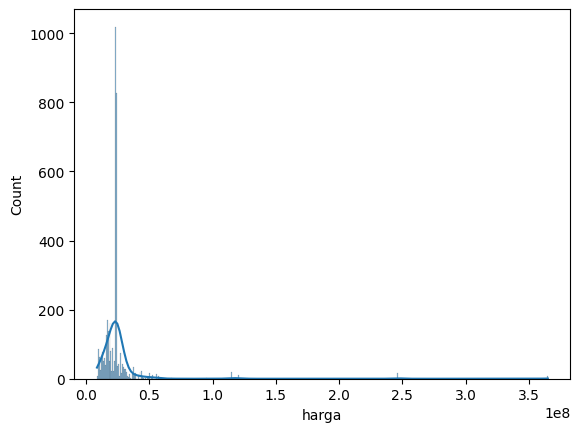

In [22]:
# Visualisasi distribusi harga motor semua merk
sns.histplot(resampled_motor['harga'], kde=True)

In [23]:
# Visualisasi distribusi harga tiap merk motor
# Subplot
fig = make_subplots(rows=2, cols=2, subplot_titles=['Honda', 'Yamaha', 'Kawasaki', 'Suzuki'])

# Plot for Honda Turbo aspiration
fig.add_trace(px.histogram(resampled_motor[resampled_motor['merk'] == 'Honda'], x='harga', nbins=30, color_discrete_sequence=['#ca91eb']).update_traces(histnorm='probability').data[0], row=1, col=1)

# Plot for Yamaha Std aspiration
fig.add_trace(px.histogram(resampled_motor[resampled_motor['merk'] == 'Yamaha'], x='harga', nbins=30, color_discrete_sequence=['#eb6426']).update_traces(histnorm='probability').data[0], row=1, col=2)

# Plot for Kawasaki Std aspiration
fig.add_trace(px.histogram(resampled_motor[resampled_motor['merk'] == 'Kawasaki'], x='harga', nbins=30, color_discrete_sequence=['#91caeb']).update_traces(histnorm='probability').data[0], row=2, col=1)

# Plot for Suzuki Std aspiration
fig.add_trace(px.histogram(resampled_motor[resampled_motor['merk'] == 'Suzuki'], x='harga', nbins=30, color_discrete_sequence=['#265aeb']).update_traces(histnorm='probability').data[0], row=2, col=2)

# Update layout
fig.update_layout(showlegend=False, title_text="Distribusi Harga Tiap Merk Motor")

# Show the plot
fig.show()


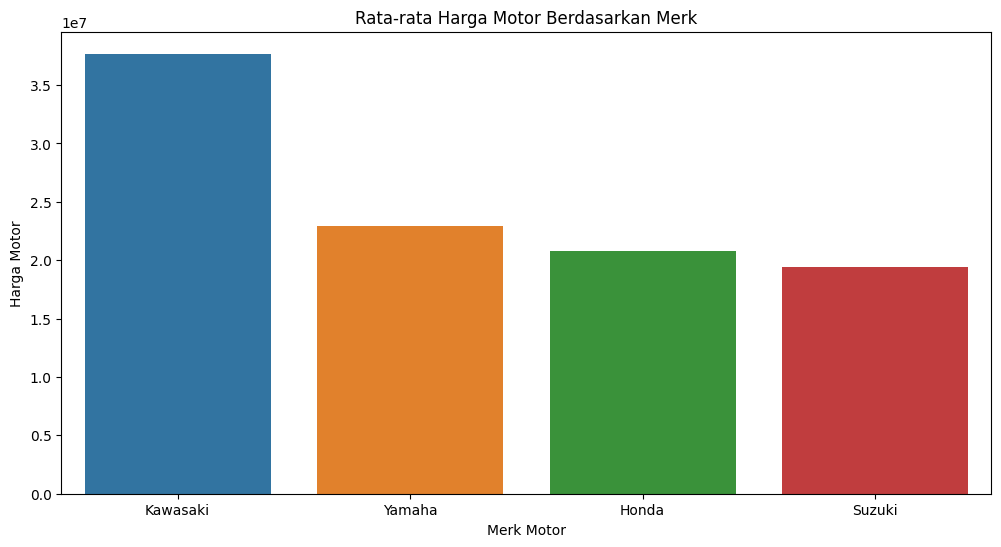

In [24]:
# Visualisasi Rata-Rata Harga Motor

hargapermerk = resampled_motor.groupby("merk")["harga"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="merk", y="harga", data=hargapermerk, order=hargapermerk.sort_values('harga', ascending=False)['merk'])
plt.title("Rata-rata Harga Motor Berdasarkan Merk")
plt.xlabel("Merk Motor")
plt.ylabel("Harga Motor")
plt.show()


Dari visualisasi, terlihat rata-rata harga paling mahal adalah merk motor Kawasaki

### Data Preparation

In [25]:
resampled_motor.head()

,nama_motor,lokasi,harga,kapasitas_mesin,tahun,transmisi,kilometer,merk
0,Yamaha Aerox 155 Vva,Kab. Tangerang,23500000.0,155,2019.0,Otomatis,>30000 KM,Yamaha
1,Yamaha Nmax Abs,Kota Jakarta Barat,24500000.0,155,2018.0,Otomatis,>30000 KM,Yamaha
2,Yamaha Aerox 155 Vva,Kota Jakarta Barat,24500000.0,125,2018.0,Otomatis,10000 - 20000KM,Yamaha
3,Yamaha Nmax Abs,Kab. Tangerang,23500000.0,155,2019.0,Manual,>30000 KM,Yamaha
4,Yamaha Aerox 155 Vva,Kab. Tangerang,23500000.0,125,2018.0,Otomatis,10000 - 20000KM,Yamaha


In [26]:
resampled_motor.tail()

,nama_motor,lokasi,harga,kapasitas_mesin,tahun,transmisi,kilometer,merk
3859,Suzuki Gsx R150,Kab. Bogor,15500000.0,150,2017.0,Manual,5000 - 10000KM,Suzuki
3860,Yamaha Aerox 155 Vva,Kota Jakarta Barat,23500000.0,155,2019.0,Manual,>30000 KM,Suzuki
3861,Suzuki Gsx R150,Kota Medan,16900000.0,150,2017.0,Manual,>30000 KM,Suzuki
3862,Suzuki Satria F150 Fighter,Kota Jakarta Barat,9850000.0,150,2015.0,Manual,>30000 KM,Suzuki
3863,Suzuki Satria F150 Fighter,Kota Jakarta Barat,9850000.0,150,2015.0,Manual,>30000 KM,Suzuki


In [27]:
resampled_motor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3857 entries, 0 to 3863
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama_motor       3857 non-null   object 
 1   lokasi           3857 non-null   object 
 2   harga            3857 non-null   float64
 3   kapasitas_mesin  3857 non-null   int32  
 4   tahun            3857 non-null   float64
 5   transmisi        3857 non-null   object 
 6   kilometer        3857 non-null   object 
 7   merk             3857 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 256.1+ KB


##### Encoding

In [28]:
# Initialize LabelEncoder
le = LabelEncoder()

# Select column wiht categorical values
cols = ['lokasi', 'transmisi', 'kilometer', 'merk']
for i in cols:
    resampled_motor[i] = le.fit_transform(resampled_motor[i]) + 1

# Check the data
resampled_motor.head()

,nama_motor,lokasi,harga,kapasitas_mesin,tahun,transmisi,kilometer,merk
0,Yamaha Aerox 155 Vva,4,23500000.0,155,2019.0,2,5,4
1,Yamaha Nmax Abs,9,24500000.0,155,2018.0,2,5,4
2,Yamaha Aerox 155 Vva,9,24500000.0,125,2018.0,2,3,4
3,Yamaha Nmax Abs,4,23500000.0,155,2019.0,1,5,4
4,Yamaha Aerox 155 Vva,4,23500000.0,125,2018.0,2,3,4


##### MinMax Scaler

##### Feature Selection

In [29]:
# Choosing X and y
X = resampled_motor.drop(columns=['harga', 'nama_motor'])
y = resampled_motor['harga']

In [30]:
# Train test split untuk feature importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
# Random forest regressor untuk memilih feature importance
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


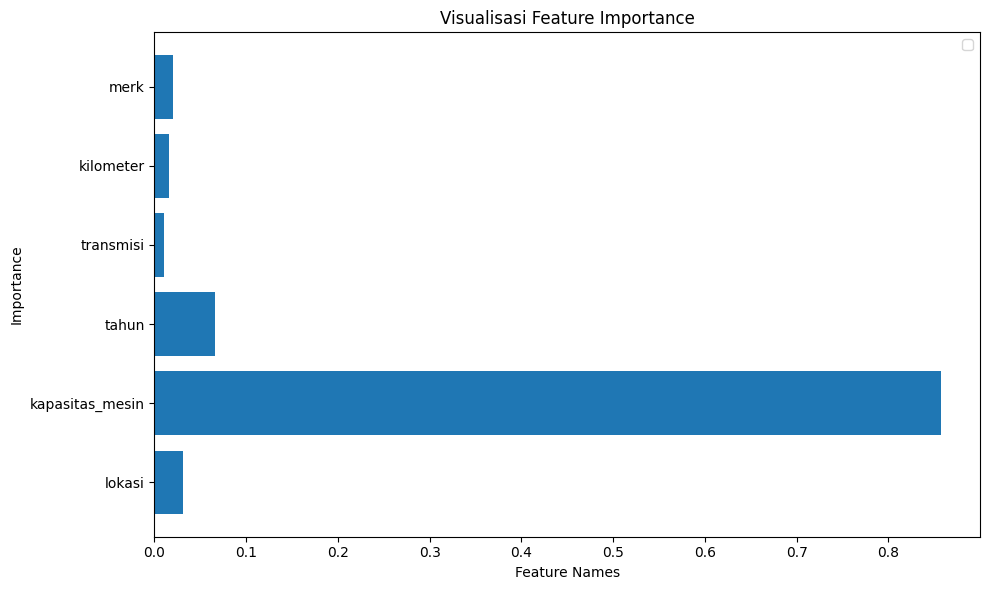

In [32]:
rf_fi = rf.feature_importances_

# Define Nama columns
feature_names = X.columns.tolist()

plt.figure(figsize=(10, 6))

# Plotting feature importances
plt.barh(feature_names, rf_fi)
plt.xlabel('Feature Names')
plt.ylabel('Importance')
plt.title('Visualisasi Feature Importance')
plt.legend()
plt.tight_layout()
plt.show()

---
#### Modeling
Pada tahap modeling, akan dilakukan:
- Seleksi fitur
- Membangun model RNN
- Tuning hyperparameter

Seleksi fitur

In [33]:
# Choosing X and y
X = resampled_motor.drop(columns=['harga', 'nama_motor', 'transmisi'])
y = resampled_motor['harga'].values.reshape(-1,1)

# Standarize
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

In [34]:
# Train test split untuk feature importance
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1, random_state=42)
# X_train_scaled = StandardScaler().fit_transform(X_train)
# X_test_scaled = StandardScaler().fit_transform(X_test)

Modeling
- Tanpa tuning hyperparameter

In [35]:
# Build the DNN model
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13249 (51.75 KB)
Trainable params: 13249 (51.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history1 = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_split=0.15)

Epoch 1/100
12/12 [==============================] - 3s 47ms/step - loss: 2.2159 - mean_absolute_error: 0.2773 - val_loss: 2.1340 - val_mean_absolute_error: 0.2541
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 1.7091 - mean_absolute_error: 0.2179 - val_loss: 1.5696 - val_mean_absolute_error: 0.2036
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 1.3826 - mean_absolute_error: 0.1882 - val_loss: 1.2800 - val_mean_absolute_error: 0.1757
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 1.2039 - mean_absolute_error: 0.1705 - val_loss: 1.1298 - val_mean_absolute_error: 0.1635
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 1.0675 - mean_absolute_error: 0.1641 - val_loss: 1.0079 - val_mean_absolute_error: 0.1744
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.9494 - mean_absolute_error: 0.1628 - val_loss: 0.8930 - val_mean_absolute_error: 0.1606
Epoch 7/100
12/1

In [38]:
loss = model.evaluate(X_test, y_test)
print(loss)

13/13 [==============================] - 0s 3ms/step - loss: 0.0671 - mean_absolute_error: 0.1012
[0.06710880994796753, 0.10116149485111237]


In [39]:
y_pred = model.predict(X_test)
print(f"R-squared: {np.round(r2_score(y_test, y_pred),2)*100}%")
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

13/13 [==============================] - 0s 2ms/step
R-squared: 98.0%
MAE:  0.10116148748493344
MSE:  0.019507341510674167


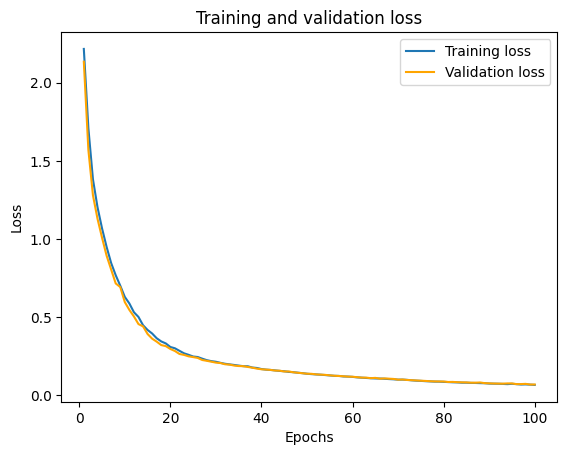

In [40]:
# let's see the training and validation accuracy by epoch
history_dict = history1.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Tuning Hyperparameter <br>
import library keras tuner

In [43]:
import keras_tuner as kt

In [44]:
# Fungsi untuk membangun model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32), 
                    input_shape=(X_train.shape[1],), activation='relu'))
    
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=256, step=32), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    
    model.add(Dense(units=hp.Int('units_3', min_value=32, max_value=256, step=32), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

In [45]:
tuner = kt.RandomSearch(build_model,
                     objective='mean_absolute_error',
                     max_trials=5,
                     executions_per_trial=5,
                     directory='./tuning3')

In [46]:
stop_early = EarlyStopping(monitor='val_loss', patience=10)

In [47]:
tuner.search(X_train, y_train, 
             epochs=100, batch_size=256, 
             validation_split=0.15,
             callbacks=[stop_early])

Trial 5 Complete [00h 01m 42s]
mean_absolute_error: 0.09481303542852401

Best mean_absolute_error So Far: 0.08667297214269638
Total elapsed time: 00h 08m 29s


In [48]:
best_model = tuner.get_best_models(num_models=1)[0]

In [49]:
tuner.results_summary()

Results summary
Results in ./tuning3\untitled_project
Showing 10 best trials
Objective(name="mean_absolute_error", direction="min")

Trial 3 summary
Hyperparameters:
units_1: 192
units_2: 192
units_3: 192
Score: 0.08667297214269638

Trial 2 summary
Hyperparameters:
units_1: 96
units_2: 256
units_3: 224
Score: 0.09120629727840424

Trial 1 summary
Hyperparameters:
units_1: 64
units_2: 128
units_3: 160
Score: 0.09203199148178101

Trial 0 summary
Hyperparameters:
units_1: 64
units_2: 256
units_3: 256
Score: 0.09361902028322219

Trial 4 summary
Hyperparameters:
units_1: 32
units_2: 224
units_3: 96
Score: 0.09481303542852401


Finalisasi Model

In [50]:
model3 = Sequential()
model3.add(Dense(192, input_shape=(X_train.shape[1],), activation='relu'))
model3.add(Dense(192, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dense(192, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [51]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 192)               1152      
                                                                 
 dense_5 (Dense)             (None, 192)               37056     
                                                                 
 dense_6 (Dense)             (None, 192)               37056     
                                                                 
 dense_7 (Dense)             (None, 1)                 193       
                                                                 
Total params: 75457 (294.75 KB)
Trainable params: 75457 (294.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
history2 = model3.fit(X_train, y_train, 
             epochs=100, batch_size=256, 
             validation_split=0.15, 
             callbacks=[stop_early])

Epoch 1/100
12/12 [==============================] - 2s 43ms/step - loss: 4.1162 - mean_absolute_error: 0.2621 - val_loss: 3.4576 - val_mean_absolute_error: 0.1935
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 3.1549 - mean_absolute_error: 0.1971 - val_loss: 2.7535 - val_mean_absolute_error: 0.1755
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 2.5035 - mean_absolute_error: 0.1699 - val_loss: 2.2053 - val_mean_absolute_error: 0.1693
Epoch 4/100
12/12 [==============================] - 0s 14ms/step - loss: 2.0225 - mean_absolute_error: 0.1734 - val_loss: 1.8202 - val_mean_absolute_error: 0.1794
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 1.6329 - mean_absolute_error: 0.1688 - val_loss: 1.4502 - val_mean_absolute_error: 0.1769
Epoch 6/100
12/12 [==============================] - 0s 14ms/step - loss: 1.3510 - mean_absolute_error: 0.1627 - val_loss: 1.1956 - val_mean_absolute_error: 0.1572
Epoch 7/100
12/1

---
#### Evaluasi

In [53]:
loss3 = model3.evaluate(X_test, y_test)
print(loss3)

13/13 [==============================] - 0s 3ms/step - loss: 0.0506 - mean_absolute_error: 0.0939
[0.05060192570090294, 0.09389190375804901]


In [54]:
y_pred3 = model3.predict(X_test)
print(f"R-squared: {np.round(r2_score(y_test, y_pred3),2)*100}%")
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("MSE: ", mean_squared_error(y_test, y_pred3))

13/13 [==============================] - 0s 3ms/step
R-squared: 98.0%
MAE:  0.09389191470861785
MSE:  0.018691346482476674


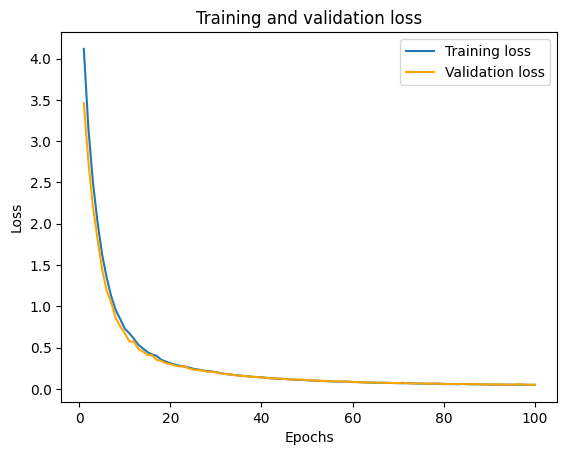

In [55]:
# let's see the training and validation accuracy by epoch
history_dict = history2.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Terlihat model memberikan akurasi yang baik.

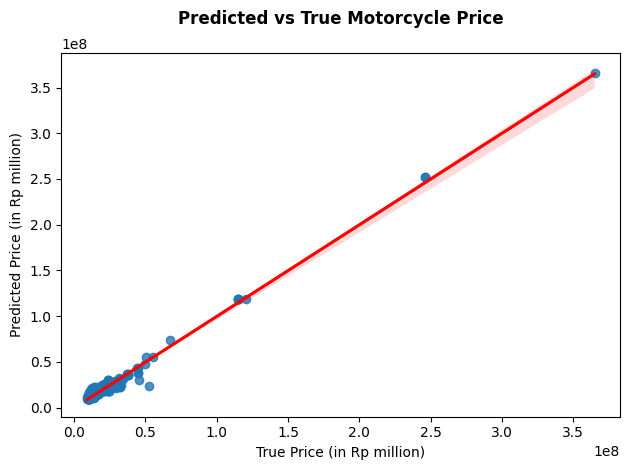

In [56]:
# Visualisasi
y_test_reverse = y_scaler.inverse_transform(y_test)
y_pred_reverse = y_scaler.inverse_transform(y_pred3)

ax = sns.regplot(x=y_test_reverse, y=y_pred_reverse, line_kws={"color": "red"})
plt.title("Predicted vs True Motorcycle Price\n", weight='bold')
plt.xlabel("True Price (in Rp million)")
plt.ylabel("Predicted Price (in Rp million)")
plt.tight_layout()
plt.show()

---
#### Save model
Model yang dengan akurasi tertinggi akan disimpan untuk di <i> deploy </i>

In [57]:
import pickle

pickle.dump(model3, open('../nn_model.pkl','wb'))
pickle.dump(X_scaler, open('../X_scaler.pkl', 'wb'))
pickle.dump(y_scaler, open('../y_scaler.pkl', 'wb'))

In [65]:
# Tes prediksi

model = pickle.load(open('../nn_model.pkl','rb'))
new_data = X_test[10]
new_data = np.array(new_data).reshape(1,-1)
pred = model.predict([new_data]) #lokasi, kapasitas_mesin, tahun, transmisi, kilometer, merk
pred = y_scaler.inverse_transform(pred)
print(pred)

1/1 [==============================] - 0s 122ms/step
[[24116828.]]


In [66]:
# Export dataset
resampled_motor.to_csv('../Dataset/Dataset_Training.csv')